In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import itertools

import sklearn
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox 

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg


from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [18]:
df=pd.read_excel("Gold_Price_US.xlsx",header=0, index_col=0, parse_dates=True)
df.head(10)

,Price
Date,
2018-01-01,1291.00
2018-01-02,1312.05
2018-01-03,1314.90
2018-01-04,1314.50
2018-01-05,1317.15
2018-01-06,NaN
2018-01-07,NaN
2018-01-08,1319.95
2018-01-09,1311.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1524 entries, 2018-01-01 to 2022-03-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1090 non-null   float64
dtypes: float64(1)
memory usage: 23.8 KB


In [4]:
df.isnull().sum()

Price    434
dtype: int64

In [19]:
df=df.interpolate(method="time")
df.head(10)

,Price
Date,
2018-01-01,1291.000000
2018-01-02,1312.050000
2018-01-03,1314.900000
2018-01-04,1314.500000
2018-01-05,1317.150000
2018-01-06,1318.083333
2018-01-07,1319.016667
2018-01-08,1319.950000
2018-01-09,1311.000000


In [6]:
df.isnull().sum()

Price    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1524 entries, 2018-01-01 to 2022-03-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1524 non-null   float64
dtypes: float64(1)
memory usage: 23.8 KB


In [8]:
df.describe()

,Price
count,1524.000000
mean,1569.386942
std,250.195357
min,1178.400000
25%,1314.300000
50%,1563.100000
75%,1800.237500
max,2067.150000


<AxesSubplot:xlabel='Date'>

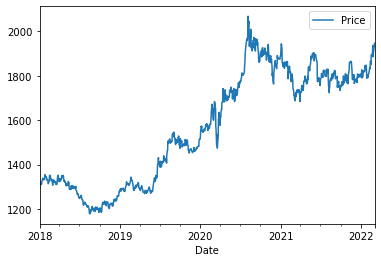

In [9]:
# Line Plot
df.plot()

<AxesSubplot:>

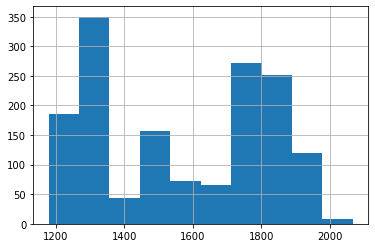

In [10]:
# Hostogram
import matplotlib.pyplot as plt
%matplotlib inline
df['Price'].hist() 

<AxesSubplot:xlabel='Price', ylabel='Density'>

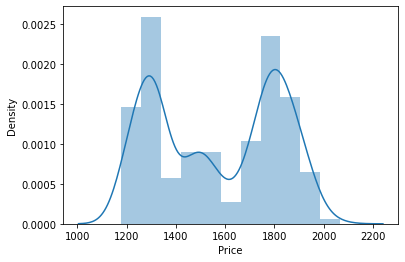

In [11]:
#Density plot
import seaborn as sns
sns.distplot(df['Price'])

(array([183., 333.,  60., 148.,  74.,  56., 234., 287., 140.,   9.]),
 array([300.77081806, 317.14530379, 333.51978951, 349.89427523,
        366.26876095, 382.64324667, 399.0177324 , 415.39221812,
        431.76670384, 448.14118956, 464.51567528]),
 <BarContainer object of 10 artists>)

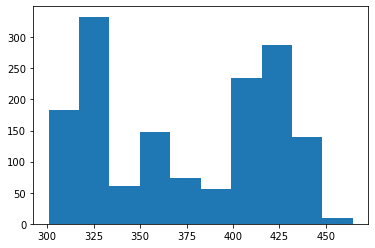

In [12]:
#Box_Cox Transform
from scipy import stats
df['Price_boxcox'] ,_ =stats.boxcox(df['Price'])
plt.hist(df.Price_boxcox)

(array([160., 237., 144.,  81., 138.,  58., 135., 341., 205.,  25.]),
 array([7.07191287, 7.12811419, 7.18431552, 7.24051684, 7.29671817,
        7.3529195 , 7.40912082, 7.46532215, 7.52152347, 7.5777248 ,
        7.63392613]),
 <BarContainer object of 10 artists>)

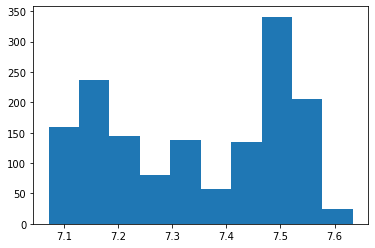

In [13]:
#Log Transform
df["logPrice"]=pd.Series(np.log(df.Price))
plt.hist(df.logPrice)

(array([173., 320.,  72., 126., 101.,  41., 193., 322., 165.,  11.]),
 array([34.32783127, 35.44164028, 36.55544928, 37.66925828, 38.78306729,
        39.89687629, 41.01068529, 42.12449429, 43.2383033 , 44.3521123 ,
        45.4659213 ]),
 <BarContainer object of 10 artists>)

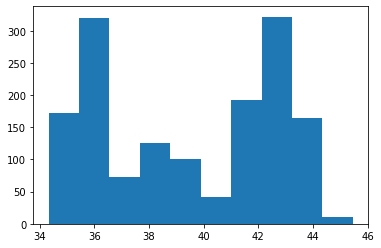

In [14]:
#square root transform
df['sqr_Price']=np.sqrt(df['Price'])
plt.hist(df.sqr_Price)

(array([ 70., 331., 286.,  46., 114., 108.,  37., 265., 138., 129.]),
 array([0.00048376, 0.00052024, 0.00055673, 0.00059321, 0.0006297 ,
        0.00066618, 0.00070267, 0.00073915, 0.00077564, 0.00081212,
        0.00084861]),
 <BarContainer object of 10 artists>)

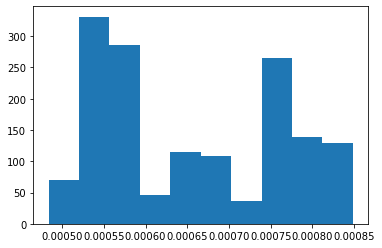

In [15]:
#Reciprocal transformation
df['Rec_Price']=1/(df['Price'])
plt.hist(df.Rec_Price)

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Price_boxcox'}>],
       [<AxesSubplot:title={'center':'logPrice'}>,
        <AxesSubplot:title={'center':'sqr_Price'}>],
       [<AxesSubplot:title={'center':'Rec_Price'}>, <AxesSubplot:>]],
      dtype=object)

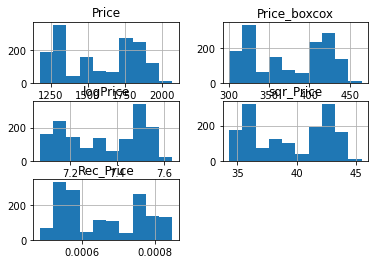

In [16]:
df.hist()

In [17]:
#Since we didnot get any conclusive evidence of being normal distribution. We have decided to move on without transforming it to normal distribution.

In [18]:
df = df.drop(['Price_boxcox', 'logPrice','Rec_Price','sqr_Price'], axis = 1)

<AxesSubplot:xlabel='Date'>

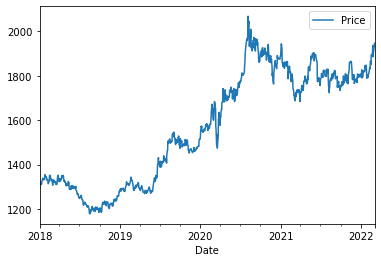

In [19]:
df.plot()

In [20]:
df.describe()

,Price
count,1524.000000
mean,1569.386942
std,250.195357
min,1178.400000
25%,1314.300000
50%,1563.100000
75%,1800.237500
max,2067.150000


In [20]:
X = df.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=1340.344554, mean2=1798.429331
variance1=11207.834613, variance2=8984.618412


In [21]:
def TestStationaryPlot(df):
    rol_mean = df.rolling(window = 20, center = False).mean()
    rol_std = df.rolling(window = 20, center = False).std()
    
    plt.plot(df, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time', fontsize = 10)
    plt.ylabel('Price', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

In [23]:
# null Hypothesis : Data is stationary
#alternate hypothesis : Data is not stationary

In [22]:
def TestStationaryAdfuller(df, cutoff = 0.01):
    df_test = adfuller(df, autolag = 'AIC')
    df_test_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value (%s)'%key] = value
    print(df_test_output)
    
    if df_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

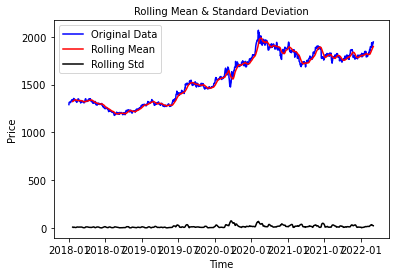

In [25]:
TestStationaryPlot(df)

In [26]:
TestStationaryAdfuller(df)

Test Statistic                   -0.464278
p-value                           0.898801
#Lags Used                        9.000000
Number of Observations Used    1514.000000
Critical Value (1%)              -3.434677
Critical Value (5%)              -2.863451
Critical Value (10%)             -2.567787
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


In [27]:
#Transforming data to Stationary by using moving average, differencing and decompostion

In [28]:
#Moving Average

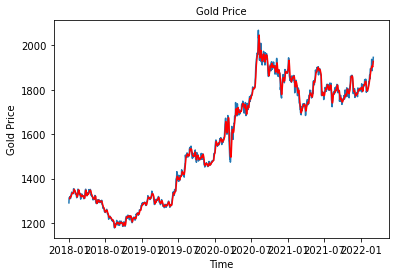

In [23]:
moving_avg = df.rolling(5).mean()
plt.plot(df)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time', fontsize = 10)
plt.ylabel('Gold Price', fontsize = 10)
plt.title('Gold Price', fontsize = 10)
plt.show()

In [24]:
moving_avg_diff = df - moving_avg
moving_avg_diff.head(13)

,Price
Date,
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,7.230000
2018-01-06,2.746667
2018-01-07,2.286667
2018-01-08,2.210000
2018-01-09,-6.040000


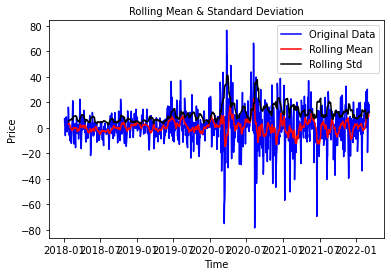

In [31]:
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [32]:
TestStationaryAdfuller(moving_avg_diff)

Test Statistic                -1.458176e+01
p-value                        4.456890e-27
#Lags Used                     6.000000e+00
Number of Observations Used    1.513000e+03
Critical Value (1%)           -3.434679e+00
Critical Value (5%)           -2.863452e+00
Critical Value (10%)          -2.567788e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


In [33]:
#First order differencing

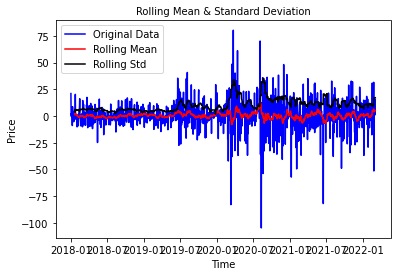

In [25]:
df_first_difference = df - df.shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))

In [35]:
TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                -1.431098e+01
p-value                        1.184451e-26
#Lags Used                     8.000000e+00
Number of Observations Used    1.514000e+03
Critical Value (1%)           -3.434677e+00
Critical Value (5%)           -2.863451e+00
Critical Value (10%)          -2.567787e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


In [36]:
#Seasonal First order differencing

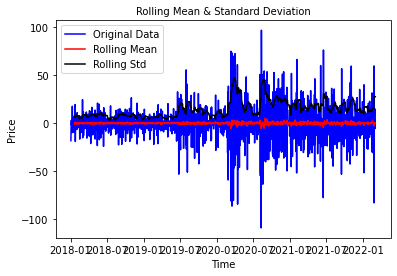

In [26]:
df_seasonal_first_difference = df_first_difference - df_first_difference.shift(1)  
TestStationaryPlot(df_seasonal_first_difference.dropna(inplace=False))

In [38]:
TestStationaryAdfuller(df_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.666886e+01
p-value                        1.551162e-29
#Lags Used                     1.800000e+01
Number of Observations Used    1.503000e+03
Critical Value (1%)           -3.434708e+00
Critical Value (5%)           -2.863465e+00
Critical Value (10%)          -2.567795e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


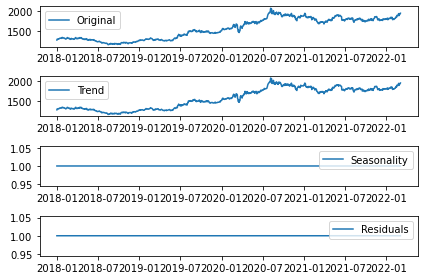

In [27]:
decomposition = seasonal_decompose(df,freq=1,model="multiplicable")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

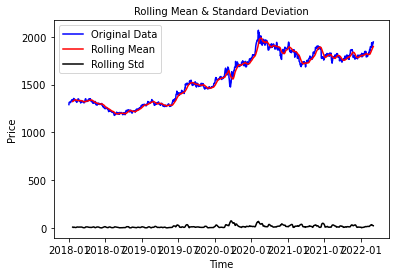

Test Statistic                   -0.464278
p-value                           0.898801
#Lags Used                        9.000000
Number of Observations Used    1514.000000
Critical Value (1%)              -3.434677
Critical Value (5%)              -2.863451
Critical Value (10%)             -2.567787
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


In [28]:
df_decompose = trend
df_decompose.dropna(inplace=True)
TestStationaryPlot(df_decompose)
TestStationaryAdfuller(df_decompose)

In [41]:
#ACF & PACF plot for seasonal first order difference

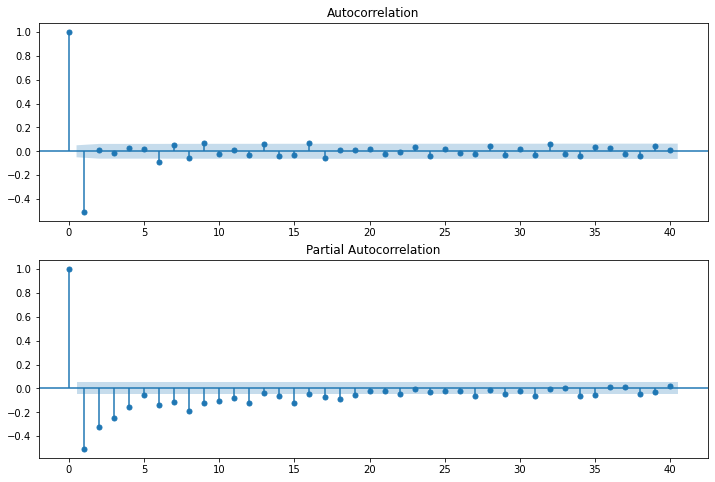

In [29]:
#ACF and PACF plots:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax2)

In [43]:
#using seasonal first order difference
df_seasonal_first_difference.head()

,Price
Date,
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,-18.20
2018-01-04,-3.25
2018-01-05,3.05


In [30]:
X = df_seasonal_first_difference.dropna(inplace=False)

In [31]:
X.head()

,Price
Date,
2018-01-03,-1.820000e+01
2018-01-04,-3.250000e+00
2018-01-05,3.050000e+00
2018-01-06,-1.716667e+00
2018-01-07,-2.273737e-13


In [32]:
# Create Training and Test
train = X.iloc[:1371]
test = X.iloc[1371:]

In [47]:
print(train.shape,test.shape)

(1371, 1) (151, 1)


In [48]:
train.head()

,Price
Date,
2018-01-03,-1.820000e+01
2018-01-04,-3.250000e+00
2018-01-05,3.050000e+00
2018-01-06,-1.716667e+00
2018-01-07,-2.273737e-13


In [49]:
test.head()

,Price
Date,
2021-10-05,-0.516667
2021-10-06,7.850000
2021-10-07,-4.100000
2021-10-08,8.750000
2021-10-09,-16.350000


Hyperparameter Tuning

In [33]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [34]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [52]:
# evaluate parameters
#p_values = [0, 1, 2]
#d_values = range(0, 2)
#q_values = range(0, 2)
#warnings.filterwarnings("ignore")
#evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA

In [35]:
#0,0,1
model_arima = ARIMA(train['Price'],order = (0,0,1))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1371
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -5336.483
Date:                Wed, 06 Apr 2022   AIC                          10678.966
Time:                        20:45:24   BIC                          10694.636
Sample:                    01-03-2018   HQIC                         10684.830
                         - 10-04-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.138      0.890      -0.002       0.002
ma.L1         -0.9998      0.023    -42.979      0.000      -1.045      -0.954
sigma2       140.0589      4.030     34.756      0.000     132.161     147.957
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):              9547.82
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               7.47   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
### make prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

2021-10-05    1.081528
2021-10-06   -0.000129
2021-10-07   -0.000129
2021-10-08   -0.000129
2021-10-09   -0.000129
                ...   
2022-02-28   -0.000129
2022-03-01   -0.000129
2022-03-02   -0.000129
2022-03-03   -0.000129
2022-03-04   -0.000129
Freq: D, Name: predicted_mean, Length: 151, dtype: float64


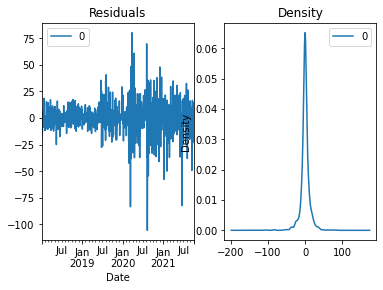

In [37]:
# Plot residual errors
residuals = pd.DataFrame(model_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [38]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [39]:
stationary_arima_acc = forecast_accuracy(pred_arima.values, test.values)
stationary_arima_acc

{'mape': inf,
 'me': -0.10245840569772294,
 'mae': 10.744012264939462,
 'mpe': nan,
 'rmse': 17.71309892387436}

Auto Regressor (AR) model

In [40]:
model_ar = AutoReg(train,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Price   No. Observations:                 1371
Model:                     AutoReg(6)   Log Likelihood               -5411.981
Method:               Conditional MLE   S.D. of innovations             12.754
Date:                Wed, 06 Apr 2022   AIC                              5.103
Time:                        20:45:39   BIC                              5.134
Sample:                    01-09-2018   HQIC                             5.115
                         - 10-04-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0031      0.345     -0.009      0.993      -0.680       0.673
Price.L1      -0.7984      0.027    -29.882      0.000      -0.851      -0.746
Price.L2      -0.5928      0.034    -17.410      0.0

In [41]:
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

2021-10-05   -0.082597
2021-10-06    2.242270
2021-10-07   -0.529264
2021-10-08    1.545216
2021-10-09   -1.882270
                ...   
2022-02-28   -0.000913
2022-03-01   -0.000913
2022-03-02   -0.000913
2022-03-03   -0.000913
2022-03-04   -0.000913
Freq: D, Length: 151, dtype: float64


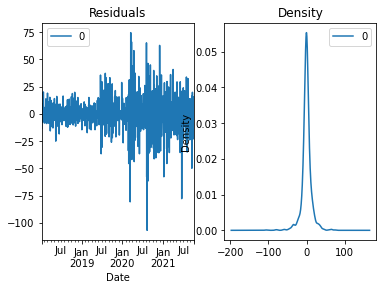

In [42]:
# Plot residual errors
residuals = pd.DataFrame(model_ar.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [43]:
stationary_ar_acc = forecast_accuracy(pred_ar.values, test.values)
stationary_ar_acc

{'mape': inf,
 'me': -0.09933793138916693,
 'mae': 10.758711778360912,
 'mpe': nan,
 'rmse': 17.71501221158127}

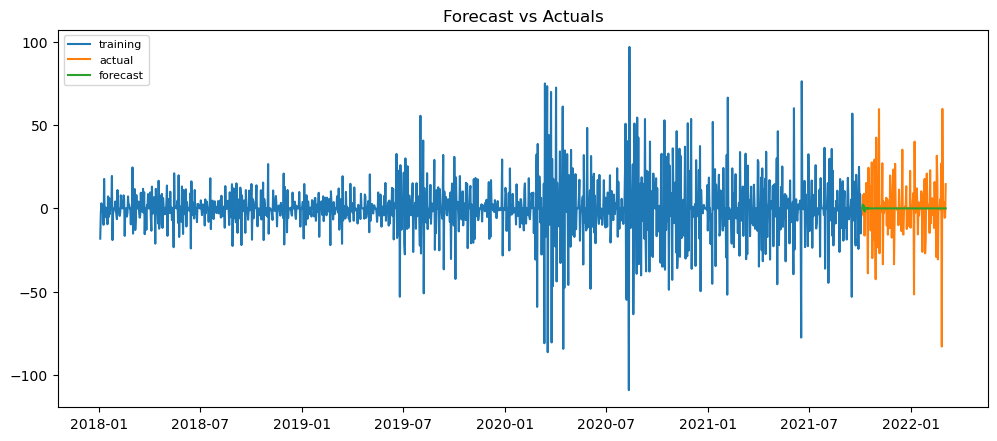

In [44]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [63]:
#Auto ARIMA model

In [45]:
!pip install pmdarima

In [46]:
import pmdarima as pm

In [47]:
model = pm.auto_arima(train['Price'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11579.649, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11167.323, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11026.313, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=10942.301, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=2.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.72 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=10944.299, Time=0.82 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 6.144 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1371
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -5467.151
Date:                Wed, 06 Apr 2022   AIC                          10942.301
Time:                        20:46:36   BIC   

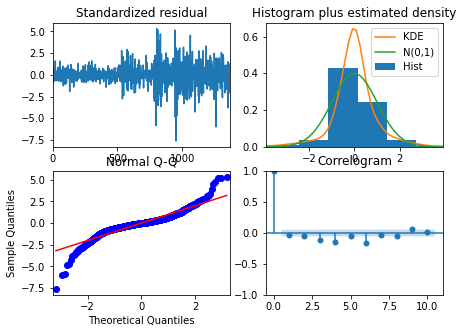

In [67]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [48]:
pred = model.predict(start=start,end=end)
print(pred)

[ 3.71965372 -2.78795996  0.30193826  0.19631598  0.39527297 -0.46507672
  0.11020051  0.04344517  0.02916473 -0.06991591]


In [49]:
stationary_aa_acc = forecast_accuracy(pred, test.values)
stationary_aa_acc

{'mape': inf,
 'me': 0.03781160077377224,
 'mae': 11.033051932434523,
 'mpe': nan,
 'rmse': 17.774376669805857}

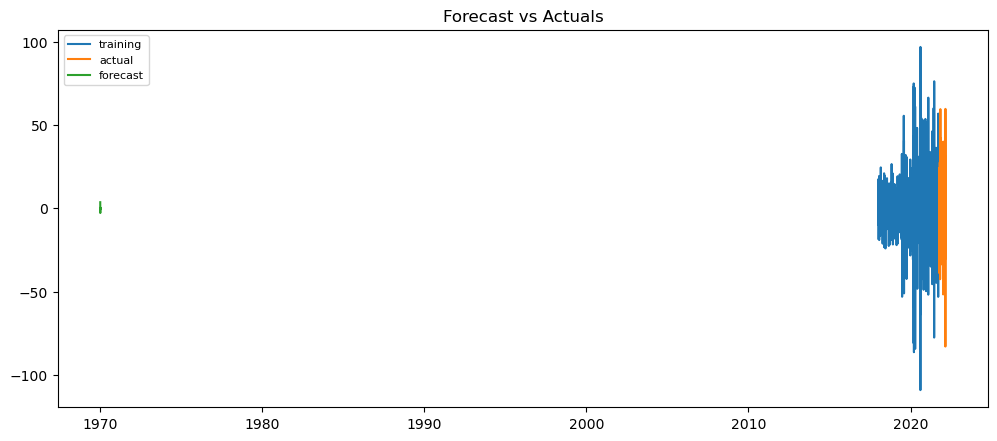

In [70]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [50]:
data = {"MODEL":pd.Series(["ARIMA","Auto Regressor","Auto ARIMA"]),"RMSE_Values":pd.Series([stationary_arima_acc["rmse"],stationary_ar_acc["rmse"],
stationary_aa_acc["rmse"]]),"MAPE_values":pd.Series([stationary_arima_acc["mape"],stationary_ar_acc["mape"],stationary_aa_acc["mape"]]),
"ME_values":pd.Series([stationary_arima_acc["me"],stationary_ar_acc["me"],stationary_aa_acc["me"]]),
"MAE_values":pd.Series([stationary_arima_acc["mae"],stationary_ar_acc["mae"],stationary_aa_acc["mae"]]),
        "MPE_values":pd.Series([stationary_arima_acc["mpe"],stationary_ar_acc["mpe"],stationary_aa_acc["mpe"]])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values,MAPE_values,ME_values,MAE_values,MPE_values
0,ARIMA,17.713099,inf,-0.102458,10.744012,NaN
1,Auto Regressor,17.715012,inf,-0.099338,10.758712,NaN
2,Auto ARIMA,17.774377,inf,0.037812,11.033052,NaN


In [72]:
#MODEL BUILDING ON NON-STATIONARY DATA / ORIGINAL DATA

In [51]:
data=pd.read_excel("Gold_Price_US.xlsx",header=0, index_col=0, parse_dates=True)
data=df.interpolate(method="time")

In [74]:
data.isna().sum()

Price    0
dtype: int64

In [52]:
df1=data.copy()

In [76]:
data.head()

,Price
Date,
2018-01-01,1291.00
2018-01-02,1312.05
2018-01-03,1314.90
2018-01-04,1314.50
2018-01-05,1317.15


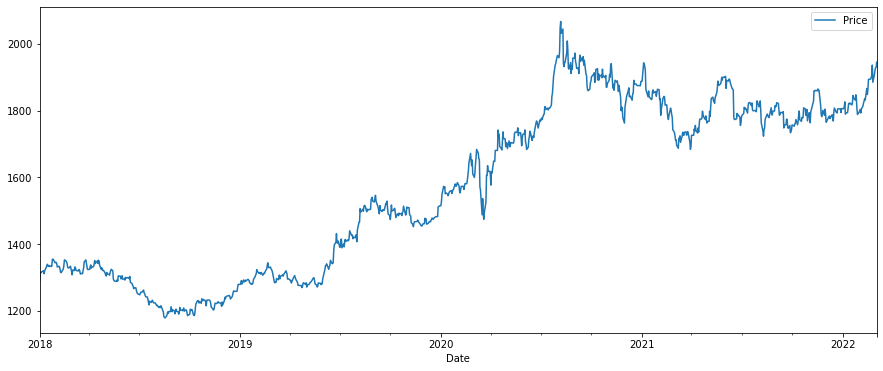

In [77]:
data.plot(figsize=(15, 6))
plt.show()

In [53]:
train = data[:1371]
test = data[1371:]
print(train.shape,test.shape)

(1371, 1) (153, 1)


In [79]:
train.head()

,Price
Date,
2018-01-01,1291.00
2018-01-02,1312.05
2018-01-03,1314.90
2018-01-04,1314.50
2018-01-05,1317.15


In [80]:
test.head()

,Price
Date,
2021-10-03,1755.383333
2021-10-04,1754.550000
2021-10-05,1753.200000
2021-10-06,1759.700000
2021-10-07,1762.100000


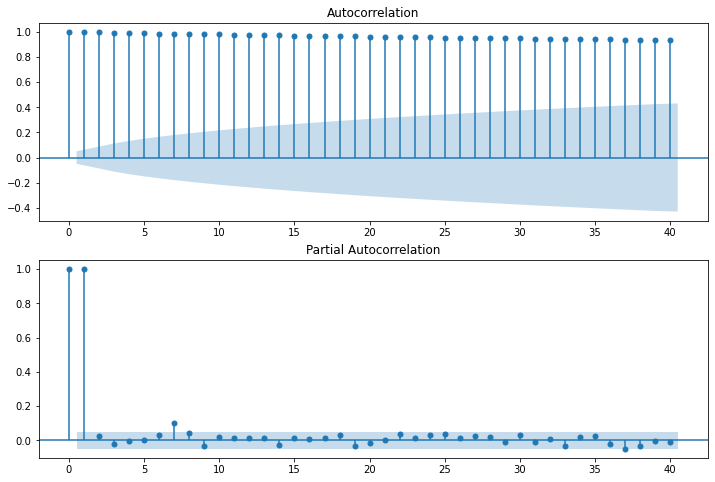

In [81]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

In [54]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [55]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [84]:
# evaluate parameters
#p_values = [0,1,2,3]
#d_values = range(0, 3)
#q_values = range(0, 3)
#warnings.filterwarnings("ignore")
#evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA

In [56]:
# (1,2,2)
model_arima = ARIMA(train['Price'],order = (1,2,2))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1371
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -5328.808
Date:                Wed, 06 Apr 2022   AIC                          10665.615
Time:                        20:47:11   BIC                          10686.502
Sample:                    01-01-2018   HQIC                         10673.432
                         - 10-02-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9292      0.076    -12.297      0.000      -1.077      -0.781
ma.L1         -0.0571      0.085     -0.674      0.501      -0.223       0.109
ma.L2         -0.9428      0.075    -12.579      0.000      -1.090      -0.796
sigma2       140.0281      6.583     21.271      0.000     127.125     152.931
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):              9476.99
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               7.53   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

2021-10-03    1755.903038
2021-10-04    1756.849217
2021-10-05    1756.624737
2021-10-06    1757.488076
2021-10-07    1757.340574
                 ...     
2022-02-28    1806.445780
2022-03-01    1806.785171
2022-03-02    1807.124540
2022-03-03    1807.463930
2022-03-04    1807.803301
Freq: D, Name: predicted_mean, Length: 153, dtype: float64


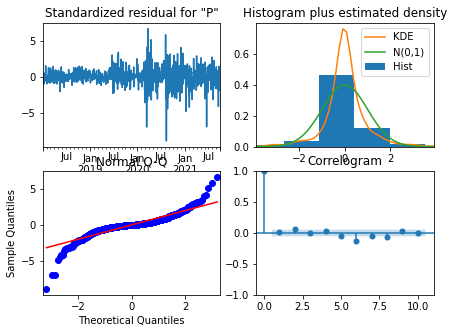

In [58]:
model_arima.plot_diagnostics(figsize=(7,5))
plt.show()

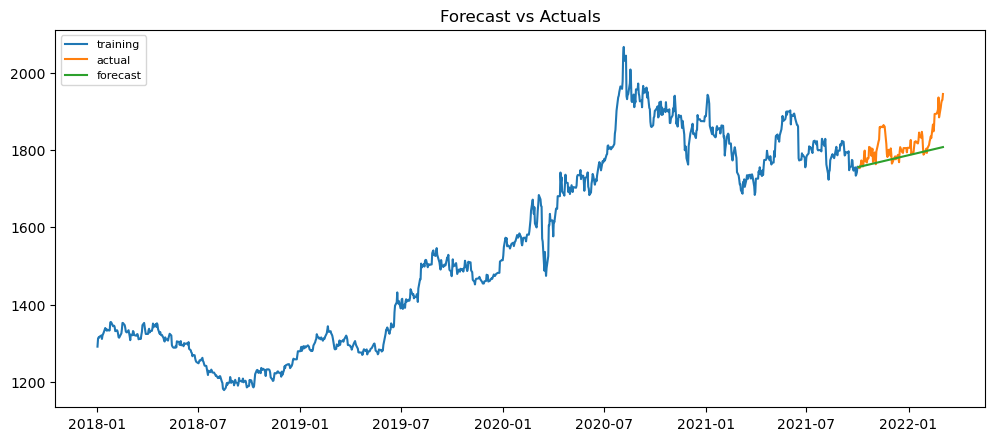

In [88]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_arima, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [59]:
ns_arima_acc = forecast_accuracy(pred_arima,test.Price)
ns_arima_acc

{'mape': 0.018394408059887308,
 'me': -32.97385444594112,
 'mae': 34.063793722773404,
 'mpe': -0.01777999611507841,
 'rmse': 47.4489232805457}

Single Exponential Smoothing

In [60]:
ses_model = SimpleExpSmoothing(train.Price).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = len(train),end = len(train)+len(test)-1)

In [61]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Simple Exponential Smoothing Model RMSE':rmse})

In [62]:
SES_acc = forecast_accuracy(pred_ses.values, test.values)
SES_acc

{'Simple Exponential Smoothing Model RMSE': 76.05408270827203}

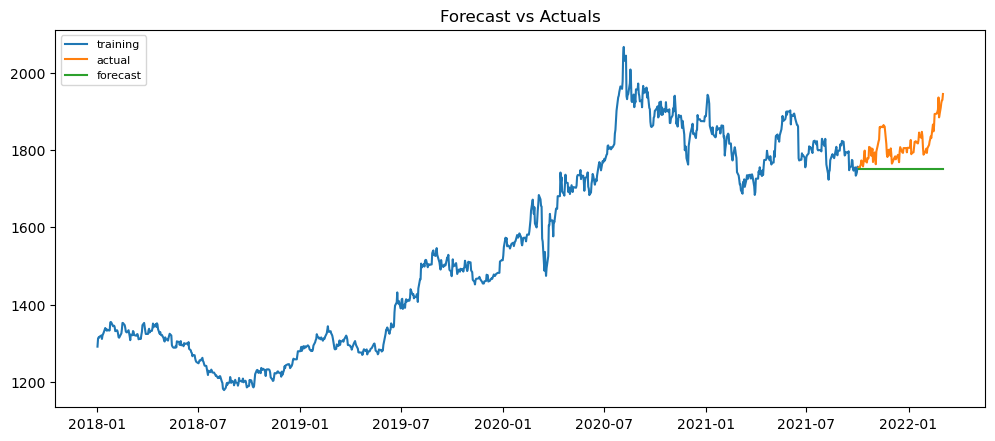

In [93]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Double Exponential Smoothing or Holt's method

In [63]:
hw_model = Holt(train.Price).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])

In [64]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Double Exponential Smoothing Model RMSE':rmse})

In [65]:
DES_acc = forecast_accuracy(pred_hw.values, test.values)
DES_acc

{'Double Exponential Smoothing Model RMSE': 82.76757257759303}

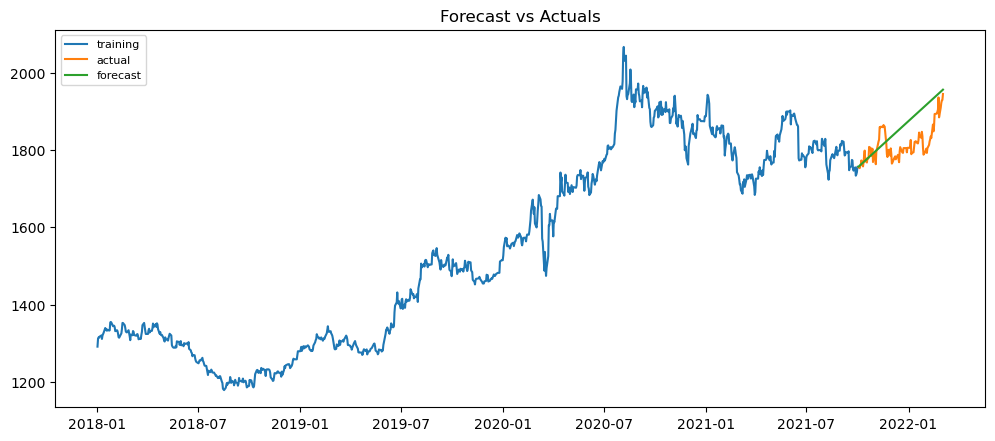

In [97]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Winter's Method

In [66]:
hwe_model_add = ExponentialSmoothing(train["Price"],seasonal="add",trend="add",seasonal_periods=2).fit() 
pred_hwe_add_add = hwe_model_add.predict(start = start,end = end)

In [67]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Holts Winter Smoothing Model RMSE':rmse})

In [68]:
Holt_acc = forecast_accuracy(pred_hwe_add_add.values, test.values)
Holt_acc

{'Holts Winter Smoothing Model RMSE': 120.5035169287514}

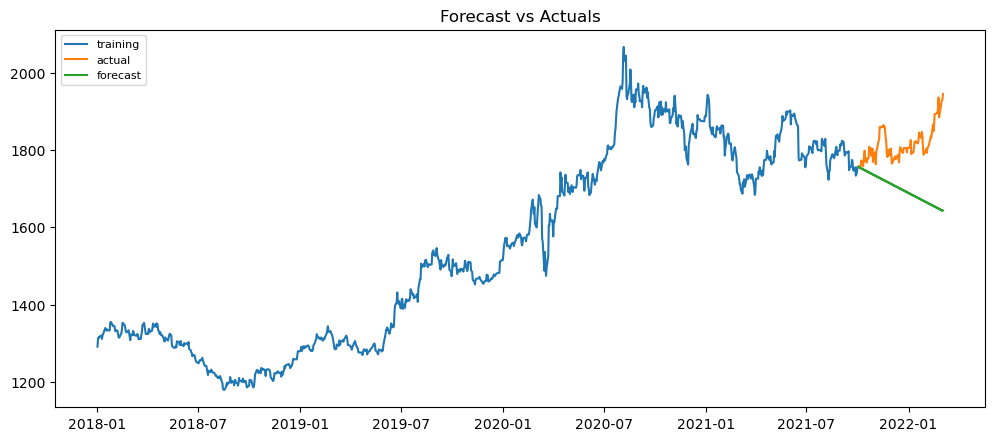

In [101]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Holts winter ES with multiplicative seasonality and additive trend

In [69]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Price"],seasonal="mul",trend="add",seasonal_periods=2).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = start,end = end)

In [70]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Holts Winter SE with multiplicative seasonality and additive trend RMSE':rmse})

In [71]:
Holt_acc1 = forecast_accuracy(pred_hwe_mul_add.values, test.values)
Holt_acc1

{'Holts Winter SE with multiplicative seasonality and additive trend RMSE': 125.47830569652561}

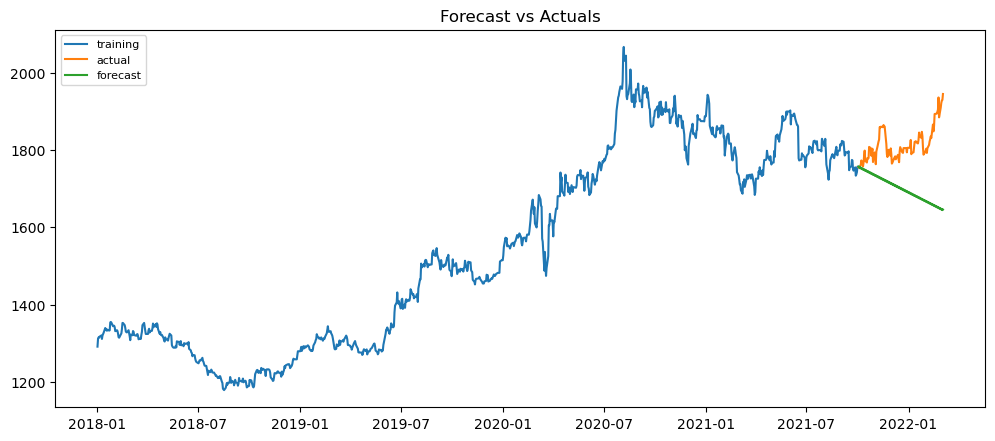

In [105]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Holts winter ES with multiplicative seasonality and multiplicative trend

In [72]:
# Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend
hwe_model_mul_mul = ExponentialSmoothing(train["Price"],seasonal="mul",trend="mul",seasonal_periods=2).fit()
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = start,end = end)

In [73]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'Holts Winter ES with multiplicative seasonality and  multiplicative trend RMSE':rmse})

In [74]:
Holt_acc2 = forecast_accuracy(pred_hwe_mul_mul.values, test.values)
Holt_acc2

{'Holts Winter ES with multiplicative seasonality and  multiplicative trend RMSE': 120.11828466136829}

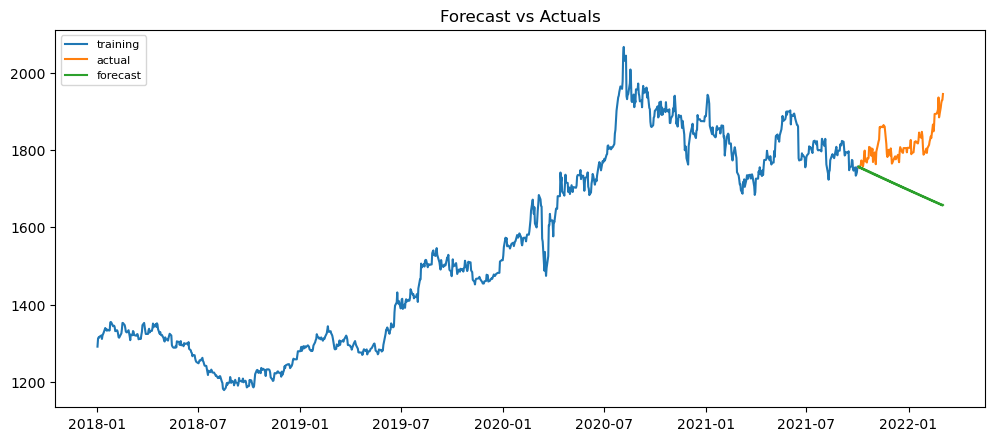

In [109]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [75]:
ns_arima_acc['rmse']

47.4489232805457

In [76]:
SES_acc

{'Simple Exponential Smoothing Model RMSE': 76.05408270827203}

In [112]:
df1

,Price
Date,
2018-01-01,1291.00
2018-01-02,1312.05
2018-01-03,1314.90
2018-01-04,1314.50
2018-01-05,1317.15
...,...
2022-02-28,1909.85
2022-03-01,1922.00
2022-03-02,1928.50


In [77]:
df1["t"] = np.arange(0,1524)
df1["t_squared"] = df1["t"] * df1["t"]
df1["Log_Price"] = np.log(df1["Price"])
df1

,Price,t,t_squared,Log_Price
Date,,,,
2018-01-01,1291.00,0,0,7.163172
2018-01-02,1312.05,1,1,7.179346
2018-01-03,1314.90,2,4,7.181516
2018-01-04,1314.50,3,9,7.181212
2018-01-05,1317.15,4,16,7.183226
...,...,...,...,...
2022-02-28,1909.85,1519,2307361,7.554780
2022-03-01,1922.00,1520,2310400,7.561122
2022-03-02,1928.50,1521,2313441,7.564498


In [78]:
train = df1[:1371]
test = df1[1371:]
print(train.shape,test.shape)

(1371, 4) (153, 4)


Linear Model

In [79]:
import statsmodels.formula.api as smf
import numpy as np

linear_model = smf.ols('Price~t',data=train).fit() #Training
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t']))) #Testing
rmse_linear = np.sqrt(np.mean((np.array(test['Price'])-np.array(pred_linear))**2)) #Evaluation metric - RMSE
rmse_linear

160.62997179910423

Exponential Model

In [80]:
Exp = smf.ols('Log_Price~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

202.8812122155641

Quadratic Model

In [81]:
#Quadratic
Quad = smf.ols('Price~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Price'])-np.array(pred_Quad))**2))
rmse_Quad

186.43290207356486

In [82]:
print("Arima RSME",ns_arima_acc['rmse'])
print(SES_acc)
print(DES_acc)
print(Holt_acc)
print(Holt_acc1)
print(Holt_acc2)
print("Linear Model RMSE",rmse_linear)
print("Exponential Model RMSE",rmse_Exp)
print("Quadratic Model is",rmse_Quad)

Arima RSME 47.4489232805457
{'Simple Exponential Smoothing Model RMSE': 76.05408270827203}
{'Double Exponential Smoothing Model RMSE': 82.76757257759303}
{'Holts Winter Smoothing Model RMSE': 120.5035169287514}
{'Holts Winter SE with multiplicative seasonality and additive trend RMSE': 125.47830569652561}
{'Holts Winter ES with multiplicative seasonality and  multiplicative trend RMSE': 120.11828466136829}
Linear Model RMSE 160.62997179910423
Exponential Model RMSE 202.8812122155641
Quadratic Model is 186.43290207356486


In [83]:
rmse_series={"MODEL":pd.Series(["ARIMA_NS","Single Exponential Smoothing","Double Exponential Smoothing or Holt's method","Holts Winter Smoothing Model","Holts Winter SE with multiplicative seasonality and additive trend","Holts Winter ES with multiplicative seasonality and  multiplicative trend","Linear Model","Exponential Model","Quadratic Modelt"]),"RMSE_Values":pd.Series([ns_arima_acc['rmse'],SES_acc,DES_acc,Holt_acc,Holt_acc1,Holt_acc2,rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(rmse_series)
table_rmse 

,MODEL,RMSE_Values
0,ARIMA_NS,47.448923
1,Single Exponential Smoothing,{'Simple Exponential Smoothing Model RMSE': 76...
2,Double Exponential Smoothing or Holt's method,{'Double Exponential Smoothing Model RMSE': 82...
3,Holts Winter Smoothing Model,{'Holts Winter Smoothing Model RMSE': 120.5035...
4,Holts Winter SE with multiplicative seasonalit...,{'Holts Winter SE with multiplicative seasonal...
5,Holts Winter ES with multiplicative seasonalit...,{'Holts Winter ES with multiplicative seasonal...
6,Linear Model,160.629972
7,Exponential Model,202.881212
8,Quadratic Modelt,186.432902


In [84]:
final_arima = ARIMA(df1['Price'],order = (1,2,2))
final_arima = final_arima.fit()
final_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1524
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -5929.142
Date:                Wed, 06 Apr 2022   AIC                          11866.284
Time:                        20:48:32   BIC                          11887.595
Sample:                    01-01-2018   HQIC                         11874.218
                         - 03-04-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9118      0.111     -8.221      0.000      -1.129      -0.694
ma.L1         -0.0751      0.115     -0.653      0.514      -0.300       0.150
ma.L2         -0.9247      0.106     -8.751      0.000      -1.132      -0.718
sigma2       140.9809      6.363     22.155      0.000     128.509     153.453
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              8867.43
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               5.87   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
final_arima.fittedvalues.tail()

Date
2022-02-28    1900.854702
2022-03-01    1911.330297
2022-03-02    1921.576659
2022-03-03    1929.774513
2022-03-04    1929.237967
dtype: float64

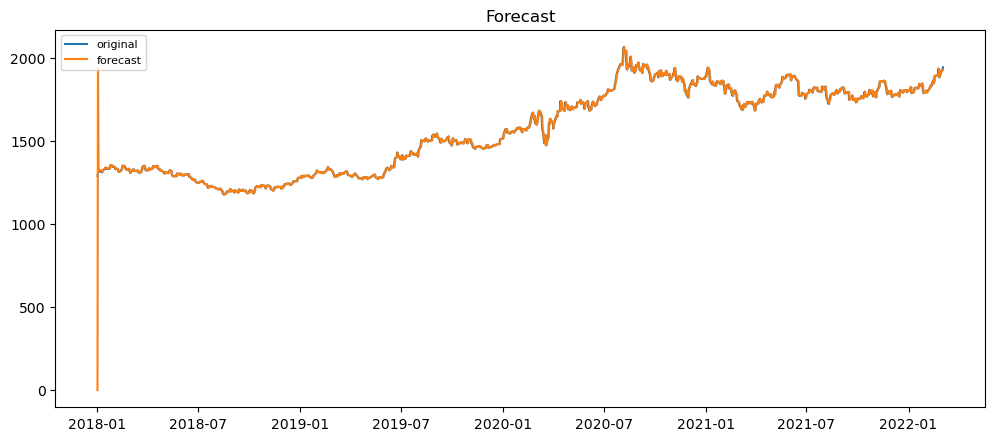

In [122]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
#plt.plot(test, label='actual')
plt.plot(final_arima.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [85]:
from pandas.tseries.offsets import DateOffset

In [86]:
future_dates=[df.index[-1]+ DateOffset(days=30)]

In [87]:
future_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df

,Price


In [88]:
future_df['Price'] = final_arima.predict(start = 1520, end = 1620, dynamic= True)
future_df.info()
future_df=future_df.astype({"Price":'int'})
future_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2022-03-01 to 2022-06-09
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   101 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


,Price
2022-03-01,1911
2022-03-02,1910
2022-03-03,1912
2022-03-04,1911
2022-03-05,1912
...,...
2022-06-05,1949
2022-06-06,1950
2022-06-07,1950
2022-06-08,1951


<AxesSubplot:>

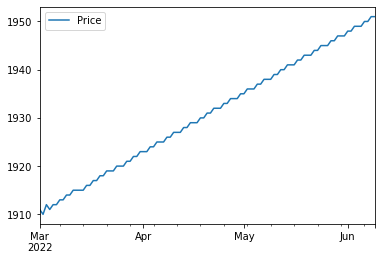

In [145]:
future_df.plot()

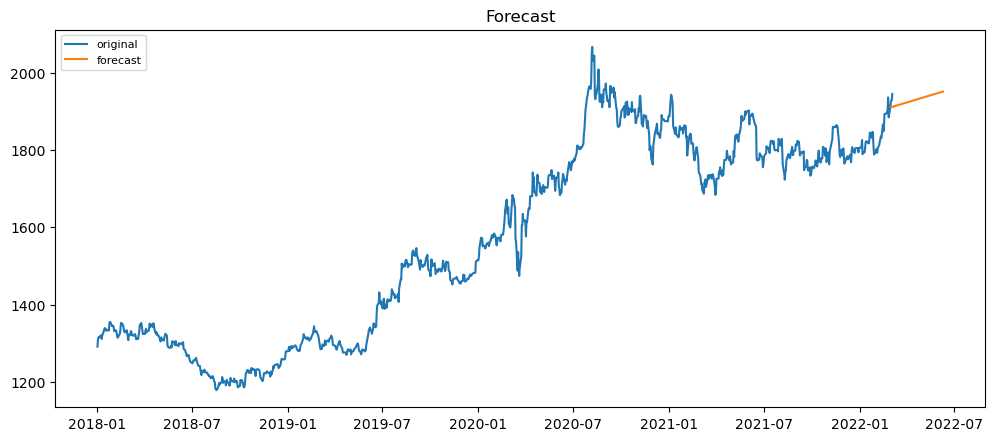

In [128]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='original')
#plt.plot(test, label='actual')
plt.plot(future_df['Price'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [129]:
# Exporting to csv file# Exporting to csv file
# future_df.to_csv(r'forecast_data_30days.csv',index=True)

In [89]:
# Saving the pickle file
import pickle
pickle.dump(final_arima, open('Forecast_arima.pkl','wb'))

In [90]:
pickle.dump(df,open('df.pkl','wb'))

In [160]:
df.to_csv(r'df.csv',index=True)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\dell\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\dell\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by th